# Exploring the Data

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
bikes = pd.read_csv("bike_rental_hour.csv")

In [3]:
bikes.head(25)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


(array([6972., 3705., 2659., 1660.,  987.,  663.,  369.,  188.,  139.,
          37.]),
 array([  1. ,  98.6, 196.2, 293.8, 391.4, 489. , 586.6, 684.2, 781.8,
        879.4, 977. ]),
 <a list of 10 Patch objects>)

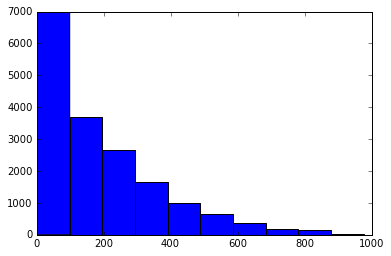

In [4]:
%matplotlib inline

plt.hist(bikes['cnt'])


In [5]:
bikes.corr()["cnt"].sort_values()

hum          -0.322911
weathersit   -0.142426
holiday      -0.030927
weekday       0.026900
workingday    0.030284
windspeed     0.093234
mnth          0.120638
season        0.178056
yr            0.250495
instant       0.278379
hr            0.394071
atemp         0.400929
temp          0.404772
casual        0.694564
registered    0.972151
cnt           1.000000
Name: cnt, dtype: float64

It can often be helpful to calculate features before applying machine learning models. Features can enhance the accuracy of models by introducing new information or distilling existing information. 

The hr column in bike_rentals contains the hours during which bikes are rented, from 1 to 24. A machine treats each hour differently, without understanding that certain hours are related. We can introduce some order into the process by creating a new column with labels for morning, afternoon, evening, and night. This bundles similar times together, enabling the model to make better decisions.



In [6]:
def assign_label(hour):
    if hour > 5 and hour < 12:
        hour = 1
    elif hour > 11 and hour < 18:
        hour = 2
    elif hour > 17 and hour < 24:
        hour = 3
    elif hour > -1 and hour < 6:
        hour = 4
    return hour
        

In [7]:
#checking the function

assign_label(0)

4

In [8]:
bikes["time_label"] = bikes["hr"].apply(assign_label)

In [9]:
bikes.head(25)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,time_label
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16,4
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40,4
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32,4
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13,4
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1,4
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1,4
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2,1
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3,1
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8,1
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14,1


In [20]:
import numpy as np

bikes = bikes.reindex(np.random.permutation(bikes.index))

train = bikes[:round(len(bikes)*0.8)]
test = bikes[round(len(bikes)*0.8):]

In [21]:
train.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,time_label
1968,1969,2011-03-27,2,0,3,20,0,0,0,1,0.28,0.2727,0.36,0.1642,7,50,57,3
11674,11675,2012-05-06,2,1,5,15,0,0,0,2,0.62,0.6061,0.61,0.1045,229,342,571,2
7971,7972,2011-12-03,4,0,12,19,0,6,0,1,0.30,0.3182,0.61,0.0896,31,144,175,3
15472,15473,2012-10-11,4,1,10,21,0,4,1,1,0.42,0.4242,0.62,0.1343,24,236,260,3
1175,1176,2011-02-21,1,0,2,18,1,1,0,2,0.24,0.2121,0.87,0.3582,2,64,66,3


# Linear Regression

Apply linear regression to the data. 

Linear regression works fairly well on this data, given that many of the columns are highly correlated with `cnt`. 

Linear regression works best when predictors are linearly correlated to the target and also independent. Ignore the casual and registered columns because cnt is derived from them.

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

predictors = ["hr", "atemp", "temp", "hum"]

lr = LinearRegression()

lr.fit(train[predictors], train["cnt"])
predictions = lr.predict(test[predictors])

mse = mean_squared_error(test["cnt"], predictions)
rmse = mse**0.5

rmse

146.1783602327082

In [26]:
np.mean(bikes["cnt"])

189.46308763450142

The rmse is very large, especially in comparisson to the mean number of bike rentals a day.

# Decision Trees

In [32]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(min_samples_leaf=2)

tree.fit(train[predictors], train["cnt"])
tree_predictions = tree.predict(test[predictors])

tree_mse = mean_squared_error(test["cnt"], tree_predictions)
tree_rmse = tree_mse**0.5

tree_rmse

123.36411334720664

In [33]:
from sklearn.tree import DecisionTreeRegressor
tree1 = DecisionTreeRegressor(min_samples_leaf=5)

tree1.fit(train[predictors], train["cnt"])
tree1_predictions = tree1.predict(test[predictors])

tree1_mse = mean_squared_error(test["cnt"], tree1_predictions)
tree1_rmse = tree1_mse**0.5

tree1_rmse

113.47628102457355

By taking the nonlinear predictors into account, the decision tree regressor appears to have much higher accuracy than linear regression.

In [35]:
# Random Forest

from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(min_samples_leaf=5)

forest.fit(train[predictors], train["cnt"])
forest_predictions = forest.predict(test[predictors])

forest_mse = mean_squared_error(test["cnt"], forest_predictions)
forest_rmse = forest_mse**0.5

forest_rmse

105.19114071211484